<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-2-phase-1-evelyntr/blob/main/Copy_of_DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Evelyn_Tran%2C_(Brandon_Brownell%2C_Erik_Luu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

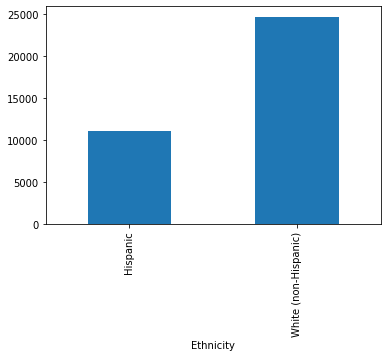

In [29]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
df_dds["Ethnicity"] = df_dds["Ethnicity"].map({
    "White not Hispanic": "White (non-Hispanic)",
    "Hispanic": "Hispanic"
})
(df_dds.groupby("Ethnicity")["Expenditures"].mean().
 plot.bar())

Based on the bar chart, we can see that the average expenditure by the DDS is much higher for White (non-Hispanic) residents than it is for Hispanic residents. The average expenditure for white residents is almost double that for Hispanic residents. 

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

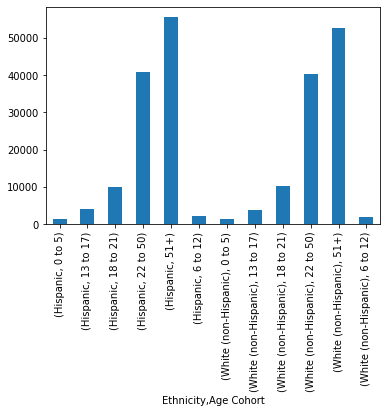

In [31]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
df_dds["Ethnicity"] = df_dds["Ethnicity"].map({
    "White not Hispanic": "White (non-Hispanic)",
    "Hispanic": "Hispanic"
})
(df_dds.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().
 plot.bar())


The graphic shows that despite the CA DDS spending more on average expenditures for white residents (found in Question 1), the CA DDS actually spends the most on Hispanic residents within the 51+ age cohort. Looking at the other age ranges, the DDS seems to spend a similar amount if not more on Hispanic residents. 

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


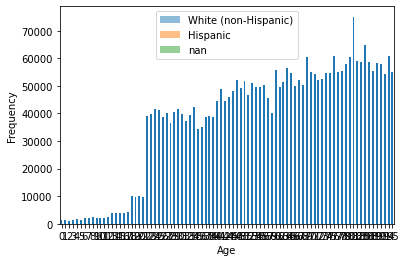

In [38]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_dds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
df_dds["Ethnicity"] = df_dds["Ethnicity"].map({
    "White not Hispanic": "White (non-Hispanic)",
    "Hispanic": "Hispanic"
})
(df_dds.groupby("Age")["Expenditures"].mean().
 plot.bar())



/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


27.97506234413965

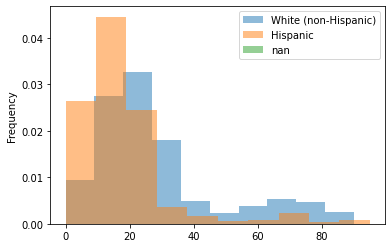

In [42]:
for e in df_dds["Ethnicity"].unique():
    df_dds[df_dds["Ethnicity"] == e]["Age"].plot.hist(
        label=e,
        density=True,
        alpha=0.5,
        legend=True
    )
df_dds[df_dds["Ethnicity"] == "White (non-Hispanic)"]["Age"].mean()


In [43]:
df_dds[df_dds["Ethnicity"] == "Hispanic"]["Age"].mean()

17.375

When looking at the average expenditure as a function of age, we can see that the average expenditure increases dramatically, the older the age. The reasoning can be due to a variety of health concerns as one ages. Analyzing the histogram above, we can also note that despite the CA DDS having the highest expenditure for Hispanic residents 51+ years old, there are much fewer Hispanic residents in that age cohort, compared to white residents. The average age of a white resident is 27 years old; whereas, the average age of a Hispanic resident is 17 years old. There is a greater number of older white residents; therefore, the DDS on average spends a higher amount. 

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.